In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
np.random.seed(42)

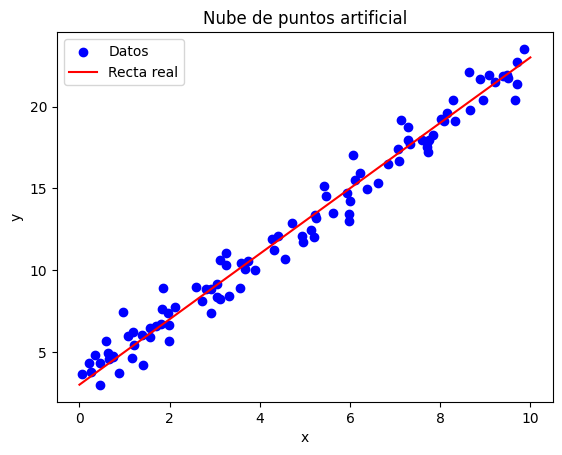

In [32]:
#cantidad de puntos
m = 100
#Generar los valores aleatorios de x entre 0 y 10
x = np.random.rand(m) * 10

#Definir slope e intercepcion
a = 2
b = 3
#Generar tolerancia aleatoria
sigma = 1
#calcular valores de y
y = a*x + b + np.random.randn(m) * sigma
#Graficar la nube de puntos artificial
plt.scatter(x, y, color='blue', label='Datos')
plt.plot([0, 10], [b, a*10+b], color='red', label='Recta real')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nube de puntos artificial')
plt.legend()
plt.show()

In [33]:
learning_rate = 0.001
n_epochs = 300
# Crear X_b para notación matricial
X_b = np.c_[np.ones((m,1)), x]
# Inicializar theta = [b, w]
theta = np.random.randn(2,1)  # 2 parámetros

In [34]:
#funcion de costo
def cost(X_b, y, theta):
    m = len(y)
    return np.mean((X_b.dot(theta) - y)**2)

In [ ]:
#SGD
cost_history = []
for epoch in range(n_epochs):
  for i in range(m):
    random_index= np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients =  2*xi.T.dot((xi.dot(theta)) - yi)
    theta = theta - learning_rate * gradients
  cost_history.append(cost(X_b,y, theta))



In [38]:
theta

array([[3.24225089],
       [1.92378374]])

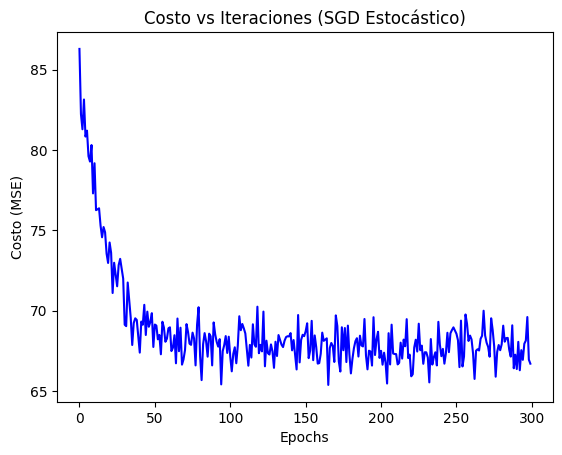

In [36]:
#Graficar costo vs iteraciones
plt.plot(range(n_epochs), cost_history, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Costo (MSE)')
plt.title('Costo vs Iteraciones (SGD Estocástico)')
plt.show()

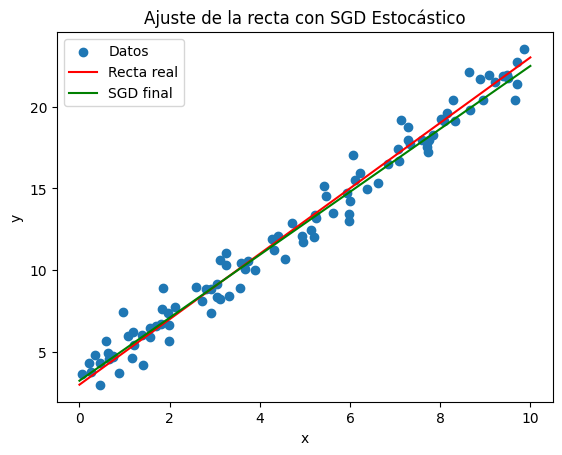

In [37]:
#Graficar Recta Final
plt.scatter(x, y, label='Datos')
plt.plot([0,10], [b, a*10+b], color='red', label='Recta real')
plt.plot([0,10], [theta[0,0], theta[0,0]+theta[1,0]*10], color='green', label='SGD final')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de la recta con SGD Estocástico')
plt.legend()
plt.show()